In [8]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data/02-processed/preprocessed_anime_data.csv")

### Histogram of top 15 genre counts

In [10]:
counts = Counter([genre for genres in df['genres'] for genre in genres.split(';')])
counts_df = pd.DataFrame(counts.items(), columns=['Genre', 'Count']).\
            sort_values('Count', ascending=False).reset_index().drop(['index'], axis=1)

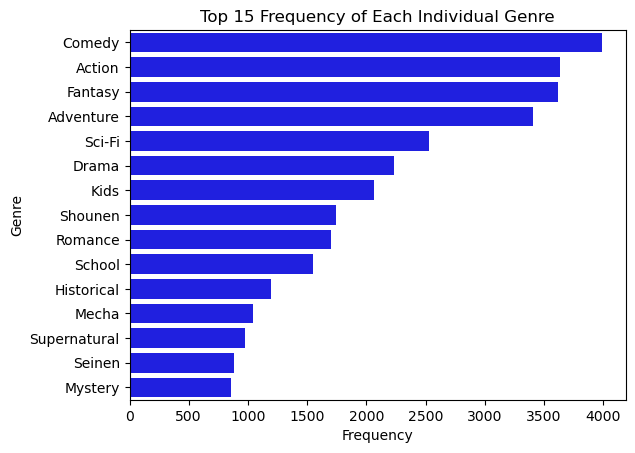

In [11]:
sns.barplot(data=counts_df.loc[:14], x='Count', y='Genre', color='blue')
plt.title('Top 15 Frequency of Each Individual Genre')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()

In [12]:
counts_df[counts_df['Genre'] == 'Slice of Life']
# slice of life is ranked 22

,Genre,Count
22,Slice of Life,454


### Frequency of number of genres of an anime

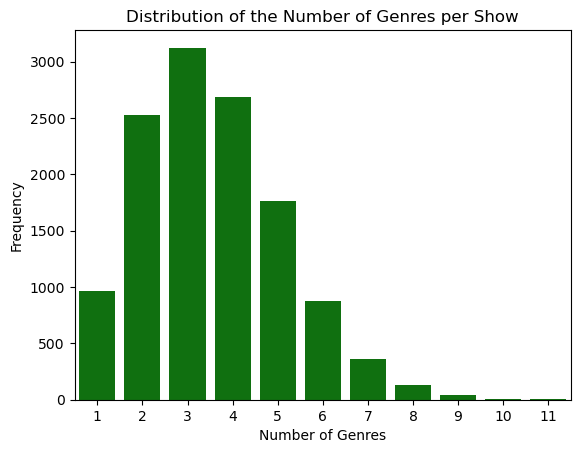

In [13]:
genre_counts = [genres.count(';') + 1 for genres in df['genres']]
sns.countplot(x=genre_counts, color='green')
plt.title('Distribution of the Number of Genres per Show')
plt.xlabel('Number of Genres')
plt.ylabel('Frequency')
plt.show()
# Most shows have at most 5 genres

## How are genres related?

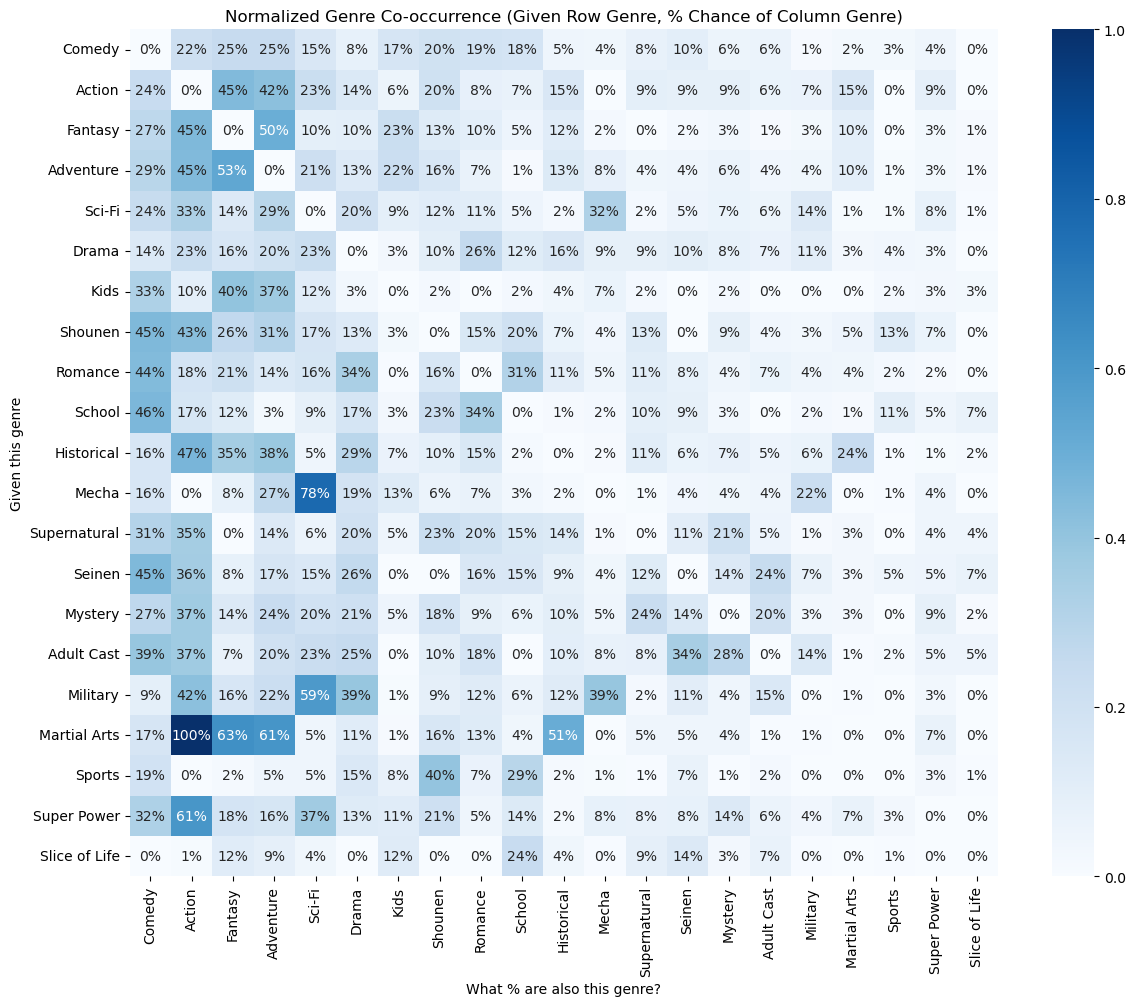

In [14]:
# one-hot genres
df_exploded = df['genres'].str.split(';').explode()
df_dummies = pd.get_dummies(df_exploded).groupby(level=0).max().astype(int)

# pick top 20 + slice of life
genres_to_plot = df_dummies.sum().nlargest(20).index.tolist()
if 'Slice of Life' in df_dummies.columns and 'Slice of Life' not in genres_to_plot:
    genres_to_plot.append('Slice of Life')
df_filtered = df_dummies[genres_to_plot]

# get co-ocurrance matrix
co_matrix_raw = df_filtered.T.dot(df_filtered)

# normalize by number of shows/genre
genre_totals = np.diag(co_matrix_raw)
co_matrix_norm = co_matrix_raw.div(genre_totals, axis=0)

# remove diag values
np.fill_diagonal(co_matrix_norm.values, 0)

plt.figure(figsize=(14, 11))
sns.heatmap(co_matrix_norm, annot=True, cmap='Blues', fmt='.0%', vmin=0, vmax=1)
plt.title('Normalized Genre Co-occurrence (Given Row Genre, % Chance of Column Genre)')
plt.ylabel('Given this genre')
plt.xlabel('What % are also this genre?')
plt.show()
